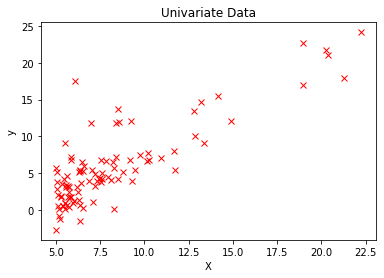

Iteration:  1  Cost:  4256.570027009518  Theta:  [[10.]
 [10.]]
Iteration:  2  Cost:  153.41562305090994  Theta:  [[9.14241135]
 [1.69691422]]
Iteration:  3  Cost:  23.704502028188692  Theta:  [[8.97091378]
 [0.22284515]]
Iteration:  4  Cost:  19.5533596506997  Theta:  [[ 8.92141228]
 [-0.03727971]]
Iteration:  5  Cost:  19.37006882101463  Theta:  [[ 8.89363145]
 [-0.08161346]]
Iteration:  6  Cost:  19.31234880158314  Theta:  [[ 8.86974598]
 [-0.08759093]]
Iteration:  7  Cost:  19.258783829512506  Theta:  [[ 8.84658712]
 [-0.08675349]]
Iteration:  8  Cost:  19.205536524093198  Theta:  [[ 8.82359151]
 [-0.08470805]]
Iteration:  9  Cost:  19.152484953790523  Theta:  [[ 8.80065895]
 [-0.08245128]]
Iteration:  10  Cost:  19.09962459672961  Theta:  [[ 8.77777157]
 [-0.08016036]]
Iteration:  11  Cost:  19.046954643559957  Theta:  [[ 8.75492613]
 [-0.07786677]]
Iteration:  12  Cost:  18.99447440464646  Theta:  [[ 8.732122  ]
 [-0.07557611]]
Iteration:  13  Cost:  18.94218319652887  Theta:  [[

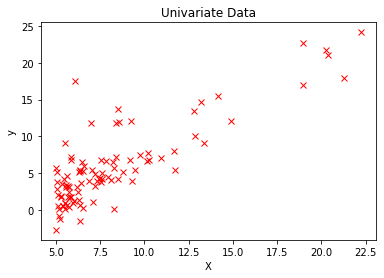

AttributeError: module 'matplotlib.pyplot' has no attribute 'hold'

In [1]:
'''
    TEST SCRIPT FOR UNIVARIATE LINEAR REGRESSION
    AUTHOR Eric Eaton, Vishnu Purushothaman Sreenivasan
'''

'''
Numpy is a standard library in python that lets you do matrix and vector operations like Matlab in python.
Check out documentation here: http://wiki.scipy.org/Tentative_NumPy_Tutorial
If you are a Matlab user this page is super useful: http://wiki.scipy.org/NumPy_for_Matlab_Users 
'''
import numpy as np
from numpy.linalg import *

# Matplotlib provides matlab like plotting tools in python
import matplotlib.pyplot as plt

# our linear regression class
from linreg import LinearRegression

# All the modules needed for 3d surface plots
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter


#------------------------------------------------------------------------------------------------
# Plotting tools already written for you.
# Feel free edit and experiment.

def plotData1D( X, y, to_block = True):
    '''
        This function is to plot y vs X where the number of predictors of X is 1.
        Input
        X - n*1 matrix or vector of length n
        y - n*1 matrix or vector of length n
        to_block - boolean flag which when set stops the program execution until the 
            plot is closed
    '''
    plt.figure(1)
    plt.clf()
    plt.title("Univariate Data")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.plot(X,y, 'rx', label='Training Data')
    plt.show(block = to_block)

def plotRegLine1D( lr_model, X, y):
    '''
        Plots the y vs X and also the regressed line according to the theta computed.
        Input
        X - n*2 matrix or vector of length n ( the second dimension is a column of ones for the bias term)
        y - n*1 matrix or vector of length n
        lr_model - linear regression trained model
    '''
    plotData1D(X[:,1], y, to_block =False)
    plt.hold(True)
    plt.plot(X[:,1],X*lr_model.theta,'b-', label='Regression Line')
    plt.legend(loc='lower right')
    plt.hold(False)
    plt.show()


def visualizeObjective(lr_model,t1_vals,t2_vals, X, y):
    '''
        The function does the surface plot of the objective for a 
        univariate regression problem with a bias term, so over 2 parameters.
        Search over the space of theta1, theta2.
        
        It also plots the gradient descent steps as blue points on the surface plot.
        Finally it plots a contour plot of the same
        
        lr_model - object of class LinReg (already trained)
        t1_vals, t2_vals - values over which the objective function should be plotted
                        List of numbers
        X - n*2 matrix or vector of length n ( the second dimension is a column of ones for the bias term)
        y - n*1 matrix or vector of length n
    '''
    T1,T2 = np.meshgrid(t1_vals, t2_vals)
    n,p = T1.shape

    # Compute the objective function over the space
    Z = np.zeros(T1.shape)
    for i in range(n):
        for j in range(p):
            Z[i,j] = lr_model.computeCost(X,y, np.matrix([T1[i,j],T2[i,j]]).T )

    fig = plt.figure()
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(T1, T2, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
        linewidth=0)

    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.hold(True)

    # If the history of the objective function plot the path taken by the gradient descent
    if lr_model.JHist !=None:
        
        for ii in range(len(lr_model.JHist)-1): 
            t1 = lr_model.JHist[ii][1].tolist()
            t2 = lr_model.JHist[ii+1][1].tolist()

            J1 = lr_model.JHist[ii][0]
            J2 = lr_model.JHist[ii+1][0]
            
            x_pts = [t1[0][0], t2[0][0]]
            y_pts = [t1[1][0], t2[1][0]]
            J_pts = [J1, J2]
            plt.plot(x_pts, y_pts, J_pts, 'b-')

        for J, t in lr_model.JHist: 
            plt.plot(t[0][0], t[1][0], J, 'mo')

    plt.title('Surface plot of the cost function')
    plt.xlabel('Theta0')
    plt.ylabel('Theta1')
    plt.show()

    # Contour plot
    plt.figure()
    plt.clf()
    CS = plt.contour(T1, T2, Z)
    plt.clabel(CS, inline=1, fontsize=10)
    plt.title('Contours of cost function')
    plt.xlabel("Theta0")
    plt.ylabel("Theta1")

    plt.hold(True)
    plt.plot(lr_model.theta[0][0],lr_model.theta[1][0], 'rx')
    plt.show()

#------------------------------------------------------------------------------------------------

if __name__ == "__main__":
    '''
        Main function to test univariate linear regression
    '''
    
    # load the data
    filePath = "data/univariateData.dat"
    file = open(filePath,'r')
    allData = np.loadtxt(file, delimiter=',')

    X = np.matrix(allData[:,:-1])
    y = np.matrix((allData[:,-1])).T

    n,d = X.shape
    
    # Add a row of ones for the bias term
    X = np.c_[np.ones((n,1)), X]
    
    # initialize the model
    init_theta = np.matrix(np.ones((d+1,1)))*10  # note that we really should be initializing this to be near zero, but starting it near [10,10] works better to visualize gradient descent for this particular problem
    n_iter = 1500
    alpha = 0.01

    # Instantiate objects
    lr_model = LinearRegression(init_theta = init_theta, alpha = alpha, n_iter = n_iter)
    plotData1D(X[:,1],y)
    lr_model.fit(X,y)
    plotRegLine1D(lr_model,X, y)

    # Visualize the objective function convex shape
    theta1_vals = np.linspace(-10, 10, 100);
    theta2_vals = np.linspace(-10, 10, 100);
    visualizeObjective(lr_model,theta1_vals, theta2_vals, X, y)

    # Compute the closed form solution in one line of code
    theta_closed_form = (X.getT()*X).getI()*X.getT()*y
    print ("theta_closed_form: ", theta_closed_form)